In [1]:
import pandas as pd
from utils.db_conn import query
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests

r = 'https://api-pub.bitfinex.com/v2/book/tBTCUSD/P2'

response = requests.get(r, params={'len': 100})
df = pd.DataFrame(response.json(), columns=['price', 'count', 'amount'])
df.amount = df.amount.abs()
df.head(5)

,price,count,amount
0,29500,56,16.548476
1,29400,105,87.055956
2,29300,48,221.164363
3,29200,94,77.374919
4,29100,84,20.251259


<AxesSubplot:xlabel='amount', ylabel='price'>

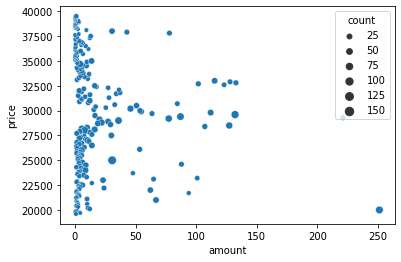

In [3]:
sns.scatterplot(y=df['price'], x=df['amount'], size=df['count'])

## Heatmap

In [4]:
columns = ['id', 'time', 'price', 'count', 'amount', 'type']

data = pd.DataFrame(query('query_orderbook', ['2022-05-25', '2022-06-03', 'P2']), columns=columns).drop('id', axis=1)
data.time = data.time.dt.strftime('%Y-%m-%d %H')
data.amount = data.amount.abs() * data['count']
data = data[['time', 'price', 'amount']].drop_duplicates()
data.head(5)

,time,price,amount
0,2022-05-25 13,29700.0,2329.0674
1,2022-05-25 13,29600.0,14689.8950
2,2022-05-25 13,29500.0,4261.1300
3,2022-05-25 13,29400.0,1775.9772
4,2022-05-25 13,29300.0,787.3788


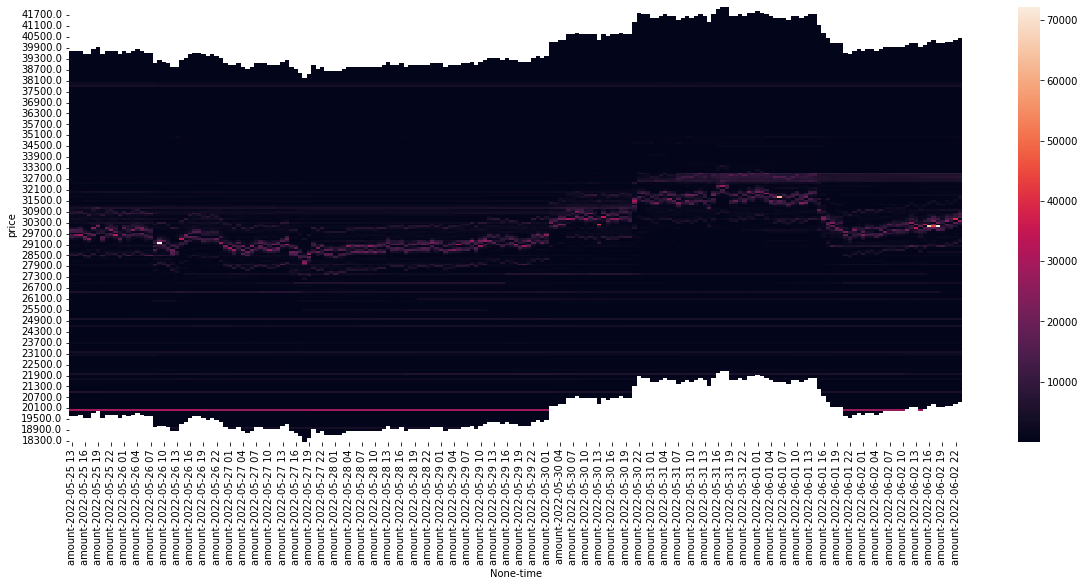

In [5]:
heatmap = data.pivot_table(data, index='price', columns=['time'])

plt.figure(figsize=(20,8))
sns.heatmap(heatmap).invert_yaxis() # xticklabels=False, yticklabels=False
plt.savefig('output.png')